In [1]:
import os
import re
import cv2
import ants
from skimage.io import imsave
import numpy as np
import nibabel as nib
from matplotlib import pyplot as plt

In [2]:
def get_file_list(folder_path):
    file_list = []
    for file_name in os.listdir(folder_path):
        file_list.append(file_name)
    sorted_file_list = sorted(file_list, key=lambda x: int(x.split('_')[0]))
    return sorted_file_list


In [3]:
folder_path = './cropped_data/data/'
files = get_file_list(folder_path)

In [4]:
files

['00000_1716x689x410.nii.gz',
 '00001_1716x693x410.nii.gz',
 '00002_1716x701x410.nii.gz',
 '00003_1716x701x410.nii.gz',
 '00004_1716x705x410.nii.gz',
 '00005_1716x709x415.nii.gz',
 '00006_1716x713x420.nii.gz',
 '00007_1716x713x420.nii.gz',
 '00008_1716x717x420.nii.gz',
 '00009_1716x737x420.nii.gz',
 '00010_1716x737x415.nii.gz',
 '00011_1716x737x415.nii.gz',
 '00012_1716x737x415.nii.gz',
 '00013_1716x749x425.nii.gz',
 '00014_1716x749x430.nii.gz',
 '00015_1716x749x430.nii.gz',
 '00016_1716x757x420.nii.gz']

In [5]:
def crop_ants_img(img,h1,h2):
    view = img.view()[int(h1*1716):int(h2*1716)]
    return ants.from_numpy(view)

In [6]:
def save_ants_img(img,h1,h2,index,num):
    name = str(index).zfill(5) + '_' +\
            str(num).zfill(2) + '_' + \
            str(int(img.physical_shape[0])) + 'x' +\
            str(int(img.physical_shape[1])) + 'x' +\
            str(int(img.physical_shape[2])) + '_' +\
            str(h1).replace('.', '-') + '_' +\
            str(h2).replace('.', '-') + '.nii.gz'
    
    ants.image_write(img,'./reg_data/' + name)

In [7]:
fixed_path = './cropped_data/data/' + files[0]
fixed_image = ants.image_read(fixed_path)
fixed_image = crop_ants_img(fixed_image,1/2,3/4)

In [8]:
# save_ants_img(fixed_image,1/2,3/4,0,2)

In [12]:
index = 12

h1 =  1/2-1/8-1/8
h2 = 3/4-1/8
moving_path = './cropped_data/data/' + files[index]
moving_image = ants.image_read(moving_path)
moving_image = crop_ants_img(moving_image,h1,h2)

print('reg on img' + str(index))

reg on img12


In [13]:
outs = ants.registration(fixed_image,moving_image,type_of_transforme='SyNRA')  
reg_img = outs['warpedmovout']  

save_path = 'reg_3min.nii.gz'
ants.image_write(reg_img,save_path)

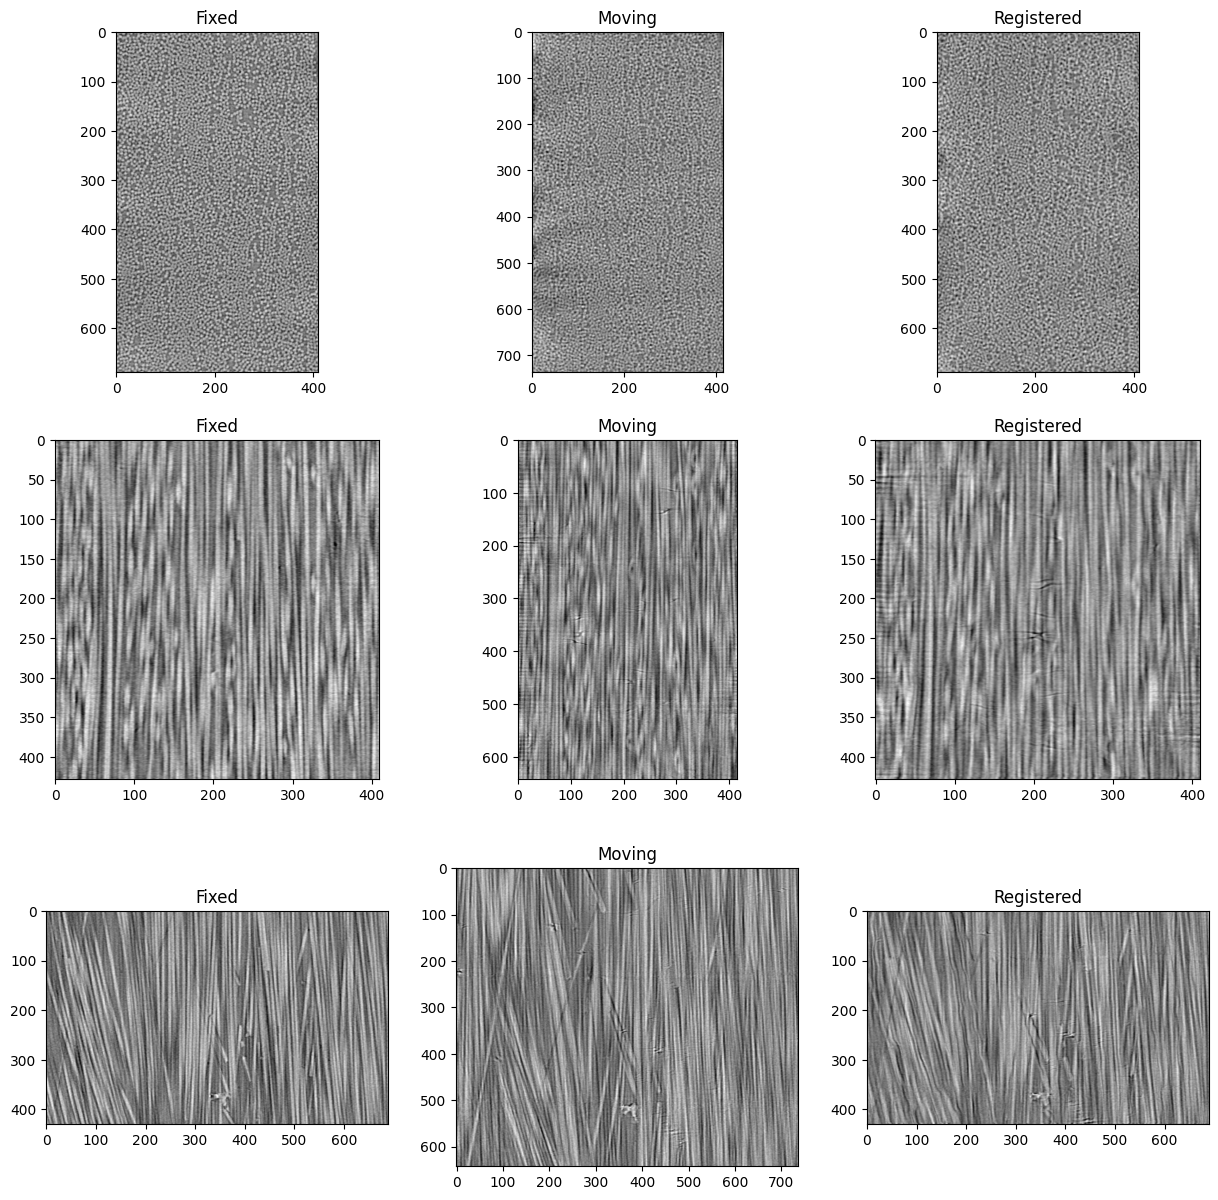

In [15]:
reg_image = nib.load(save_path).get_fdata()


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


# slice_x = fix_image[50, :, :]
# slice_y = move_image[50, :, :]
# slice_z = reg_image[50, :, :]


axes[0,0].imshow(fixed_image[200, :, :], cmap='gray')
axes[0,0].set_title('Fixed')

axes[0,1].imshow(moving_image[200, :, :], cmap='gray')
axes[0,1].set_title('Moving')

axes[0,2].imshow(reg_image[200, :, :], cmap='gray')
axes[0,2].set_title('Registered')

axes[1,0].imshow(fixed_image[:, 400, :], cmap='gray')
axes[1,0].set_title('Fixed')

axes[1,1].imshow(moving_image[:, 400, :], cmap='gray')
axes[1,1].set_title('Moving')

axes[1,2].imshow(reg_image[:, 400, :], cmap='gray')
axes[1,2].set_title('Registered')

axes[2,0].imshow(fixed_image[:, :, 200], cmap='gray')
axes[2,0].set_title('Fixed')

axes[2,1].imshow(moving_image[:, :, 200], cmap='gray')
axes[2,1].set_title('Moving')

axes[2,2].imshow(reg_image[:, :, 200], cmap='gray')
axes[2,2].set_title('Registered')

plt.show()

Text(0.5, 1.0, 'Registered')

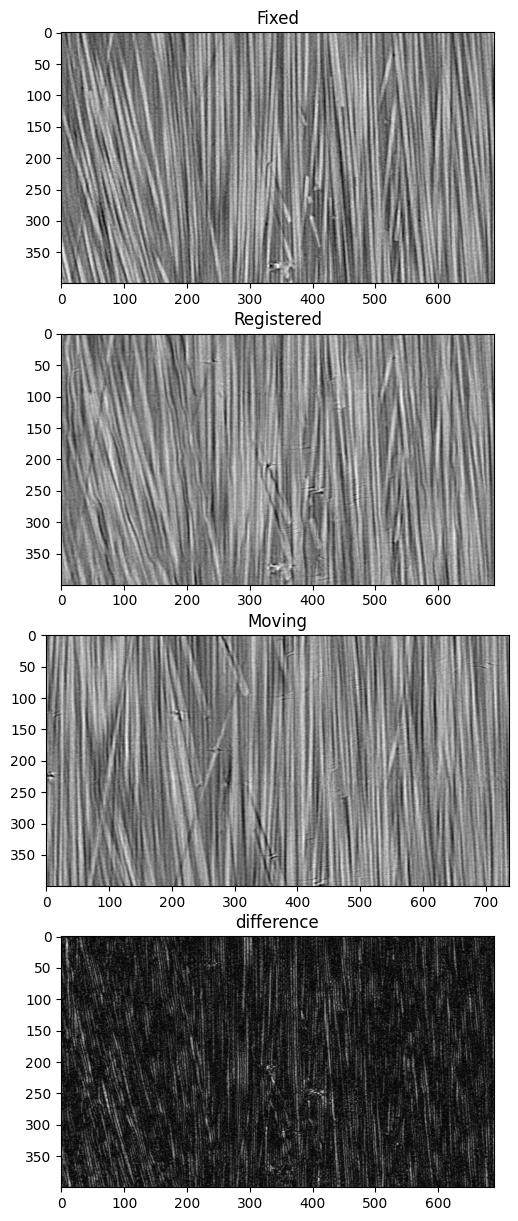

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(15, 15))


axes[0].imshow(fixed_image[:400, :, 200], cmap='gray')
axes[0].set_title('Fixed')

axes[2].imshow(moving_image[:400, :, 200], cmap='gray')
axes[2].set_title('Moving')

axes[3].imshow(np.abs(reg_image[:400, :, 200]-fixed_image[:400, :, 200]), cmap='gray')
axes[3].set_title('difference')

axes[1].imshow(reg_image[:400, :, 200], cmap='gray')
axes[1].set_title('Registered')

In [17]:
save_ants_img(reg_img,h1,h2,index,2)

In [18]:
reg_ratio = {
    (12,1/4,1/2):(1/16,53/128),
    (11,1/4,1/2):(1/16,53/128),
    (10,1/4,1/2):(1/16,53/128),
    (9,1/4,1/2):(3/32,49/128),
    (8,1/4,1/2):(3/32,49/128),
    (7,1/4,1/2):(1/16,49/128),
    (1,1/4,1/2):(7/32,17/32),
    (2,1/4,1/2):(13/64,15/32),
    (3,1/4,1/2):(49/256,29/64),
    (4,1/4,1/2):(21/128,109/256), 
    
    (1,1/2,3/4):(7/16,101/128),
    (2,1/2,3/4):(29/64,47/64),
    (3,1/2,3/4):(7/16,183/256),
    (4,1/2,3/4):(105/256,11/16),
    (7,1/2,3/4):(47/128,45/64),
    (8,1/2,3/4):(45/128,43/64),
    (9,1/2,3/4):(181/512,5/8),
    (10,1/2,3/4):(11/32,11/16),
    (11,1/2,3/4):(87/256,351/512),
    (12,1/2,3/4):(1/4,5/8),
}

In [19]:
#todo 04-01

In [20]:
from fractions import Fraction

decimal_number = 0.685546875
fraction = Fraction(decimal_number).limit_denominator()

print(fraction)  

351/512
